In [45]:
# Imports necessary for the project
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

Data Collection and Cleaning

In [32]:
from google.colab import files
uploaded = files.upload()

In [46]:
workers = pd.read_csv("cleaned_data.csv")

In [47]:
workers = workers[workers['EDUC_GROUP'] != 'Other']
workers

,SEX,RACE,AGE,EDUC,UHRSWORKT,hourly_wage,INCWAGE,EDUC_GROUP
0,Female,White,63,73,40.0,25.240385,52500.0,High School Graduate
1,Male,White,64,73,48.0,13.621795,34000.0,High School Graduate
2,Female,White,54,73,44.0,17.482517,40000.0,High School Graduate
3,Male,White,37,73,21.0,7.714286,8424.0,High School Graduate
4,Female,White,35,91,40.0,20.192308,42000.0,Associate Degree
...,...,...,...,...,...,...,...,...
274316,Female,White,41,111,40.0,0.000000,0.0,Bachelor’s Degree
274317,Female,White,60,111,40.0,28.846154,60000.0,Bachelor’s Degree
274318,Male,White,62,73,40.0,29.807692,62000.0,High School Graduate
274319,Female,White,33,81,20.0,18.269231,19000.0,"Some College, No Degree"


Model Building

In [51]:
# Split Data into a training and testing set (80% for training and 20% for testing)
X = workers.drop(columns=["hourly_wage"])
y = workers["hourly_wage"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

X_train = X_train.fillna(0).astype(np.float32)
X_test = X_test.fillna(0).astype(np.float32)

In [52]:
# Training X:
X_train

,AGE,EDUC,UHRSWORKT,INCWAGE,SEX_Male,RACE_Asian,RACE_Black,RACE_Hawaiian/Pacific Islander,RACE_Other,RACE_Two or more races,RACE_White,EDUC_GROUP_Associate Degree,EDUC_GROUP_Bachelor’s Degree,EDUC_GROUP_High School G,EDUC_GROUP_High School Graduate,EDUC_GROUP_Master’s Degree,"EDUC_GROUP_Some College, No Degree"
267675,51.0,111.0,40.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
146795,58.0,73.0,40.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
242533,27.0,111.0,37.0,50000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
178369,26.0,92.0,40.0,28000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
271625,29.0,91.0,40.0,36000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127089,59.0,111.0,40.0,30000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
109808,51.0,125.0,60.0,110000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
139803,60.0,73.0,28.0,23000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
155589,56.0,73.0,50.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
# Training Y:
y_train

,hourly_wage
267675,14.423077
146795,16.826923
242533,25.987526
178369,13.461538
271625,17.307692
...,...
127089,14.423077
109808,35.256410
139803,15.796703
155589,11.538462


In [54]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [55]:
print(X_train.dtypes)


AGE                                   float32
EDUC                                  float32
UHRSWORKT                             float32
INCWAGE                               float32
SEX_Male                              float32
RACE_Asian                            float32
RACE_Black                            float32
RACE_Hawaiian/Pacific Islander        float32
RACE_Other                            float32
RACE_Two or more races                float32
RACE_White                            float32
EDUC_GROUP_Associate Degree           float32
EDUC_GROUP_Bachelor’s Degree          float32
EDUC_GROUP_High School G              float32
EDUC_GROUP_High School Graduate       float32
EDUC_GROUP_Master’s Degree            float32
EDUC_GROUP_Some College, No Degree    float32
dtype: object


In [56]:
# Neural Network

# Convert to tensors in mini-batches
train_dataset = TensorDataset(
    torch.from_numpy(X_train.values).float(),
    torch.from_numpy(y_train.values).float().unsqueeze(1)
)

test_dataset = TensorDataset(
    torch.from_numpy(X_test.values),
    torch.from_numpy(y_test.values).unsqueeze(1)
)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512)

class WageNN(nn.Module):
    def __init__(self, input_dim):
        super(WageNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.model(x)

model = WageNN(X_train.shape[1])

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.MSELoss()

# Training loop
EPOCHS = 100

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = loss_fn(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 10/100, Loss: 1513.8676
Epoch 20/100, Loss: 1109.8824
Epoch 30/100, Loss: 1032.7180
Epoch 40/100, Loss: 1015.6846
Epoch 50/100, Loss: 1010.4637
Epoch 60/100, Loss: 1004.5011
Epoch 70/100, Loss: 1003.1782
Epoch 80/100, Loss: 990.3709
Epoch 90/100, Loss: 982.3575
Epoch 100/100, Loss: 1114.8708


In [57]:
# Predict with the neural networok
model.eval()
y_pred_list = []

with torch.no_grad():
    for batch_X, _ in test_loader:
        preds = model(batch_X)
        y_pred_list.append(preds)

# Stacking predictions together
y_pred_nn = torch.vstack(y_pred_list).squeeze().numpy()

Sample Prediction

In [58]:
# made-up person to test on
sample = {
    'AGE': 30,
    'UHRSWORKT': 40,
    'INCWAGE': 60000,
    'SEX_Male': 1,
    'RACE_White': 1,
    'RACE_Asian': 0,
    'RACE_Black': 0,
    'RACE_Hawaiian/Pacific Islander': 0,
    'RACE_Other': 0,
    'RACE_Two or more races': 0,
    'EDUC_Bachelor’s Degree': 1,
    'EDUC_Doctorate Degree': 0,
    'EDUC_Less than High School': 0,
    'EDUC_Master’s Degree': 0,
    'EDUC_Some College, No Degree': 0
}

# Convert the person to data frame
sample_df = pd.DataFrame([sample])
sample_df = sample_df.reindex(columns=X_train.columns, fill_value=0)
sample_df = sample_df.astype(np.float32)

sample_pred_lr = lr.predict(sample_df)[0]
print(f"Linear Regression Predicted Hourly Wage: ${sample_pred_lr:.2f}")

sample_tensor = torch.tensor(sample_df.values, dtype=torch.float32)
model.eval()
with torch.no_grad():
    sample_pred_nn = model(sample_tensor).item()

print(f"Neural Network Predicted Hourly Wage: ${sample_pred_nn:.2f}")

Linear Regression Predicted Hourly Wage: $28.79
Neural Network Predicted Hourly Wage: $26.49


In [62]:
# Compare with the actual data:
matches = workers[
    (workers['AGE'] == 30) &
    (workers['SEX'] == 'Male') &
    (workers['RACE'] == 'White') &
    (workers['EDUC_GROUP'] == "Bachelor’s Degree") &
    (workers['UHRSWORKT'] == 40)
]

# print(matches[['hourly_wage', 'AGE', 'SEX', 'RACE', 'EDUC', 'UHRSWORKT']])

actual_mean_wage = matches['hourly_wage'].mean()
print(f"Average Actual Hourly Wage for this group: ${actual_mean_wage:.2f}")

Average Actual Hourly Wage for this group: $34.60


Model Evaluation

In [63]:
# RMSE: Root Mean Squared Error; Measures the size of a model's mistakes. Penalizes big errors more.
# MAE: Mean Absolute Error; Measures the average size of mistakes.
# R^2 Score: Measures how much of the variation in wages the model can explain.

# Linear Regression:
print("Linear Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

# Neural Network
print("\nNeural Network Evaluation:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("R2 Score:", r2_score(y_test, y_pred_nn))

Linear Regression Results:
RMSE: 27.118867589447927
MAE: 4.601646530987878
R2 Score: 0.6332488815307505

Neural Network Evaluation:
RMSE: 27.485950516991423
MAE: 6.969370400999904
R2 Score: 0.6232529448337527


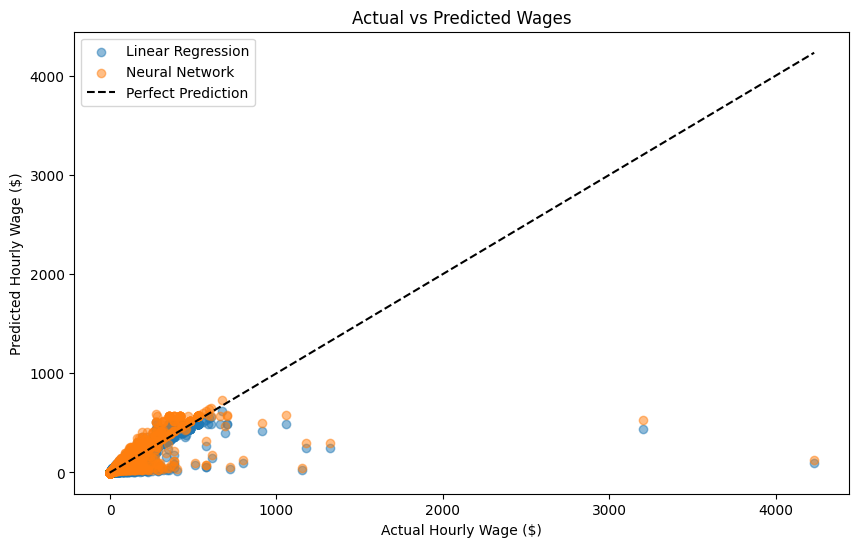

In [64]:
# Plot
plt.figure(figsize=(10,6))

# Linear Regression
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')

# Neural Network
plt.scatter(y_test, y_pred_nn, alpha=0.5, label='Neural Network')

# Perfect prediction line
min_val = min(y_test.min(), y_pred_lr.min(), y_pred_nn.min())
max_val = max(y_test.max(), y_pred_lr.max(), y_pred_nn.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

plt.xlabel('Actual Hourly Wage ($)')
plt.ylabel('Predicted Hourly Wage ($)')
plt.title('Actual vs Predicted Wages')
plt.legend()
plt.show()
